## Importing necessary libraries and modules for this notebook<a name ="h3"></a>

In [3]:
!pip install tensorflow

In [4]:
'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd
import os

'''Visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Manipulating Data and Model Building'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

'''Implementation of Transfer Learning'''
from tensorflow.keras.applications import MobileNetV2

'''Image generation and preprocessing'''
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''Result and Performance Analysis'''
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

'''Ignoring Warnings'''
import warnings
warnings.filterwarnings("ignore")

C:\Users\SRAVYA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Exploratory Analysis<a name ="h4"></a>

In [5]:
DIR = '/Users/SRAVYA/Downloads/archive (1)'
#Creating a master directory
classes = [i for i in os.listdir(DIR) if '.' not in i]                     #Creating classes out of the required folders
classes

['Black Sea Sprat',
 'Clams',
 'Corals',
 'Crabs',
 'Dolphin',
 'Eel',
 'Fish',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Jelly Fish',
 'Lobster',
 'Nudibranchs',
 'Octopus',
 'Otter',
 'Penguin',
 'Puffers',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Sea Rays',
 'Sea Urchins',
 'Seahorse',
 'Seal',
 'Sharks',
 'Shrimp',
 'Squid',
 'Starfish',
 'Striped Red Mullet',
 'Trout',
 'Turtle_Tortoise',
 'Whale']

In [6]:
import os
import pandas as pd

DIR = '/Users/SRAVYA/Downloads/archive (1)'

label = []
path = []

for dirname, _, filenames in os.walk(DIR):
    for filename in filenames:
        if filename.endswith(('.png', '.jpg','.jpeg')) and 'GT' not in dirname:
            label.append(os.path.split(dirname)[-1])
            path.append(os.path.join(dirname, filename))

# Create the dataframe
df = pd.DataFrame({'path': path, 'label': label})
df['path']=path


In [7]:
df.head(9)

,path,label
0,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat
1,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat
2,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat
3,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat
4,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat
5,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat
6,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat
7,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat
8,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat


In [8]:
df.path[0]

'/Users/SRAVYA/Downloads/archive (1)\\Black Sea Sprat\\Black Sea Sprat\\00001.png'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21711 entries, 0 to 21710
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    21711 non-null  object
 1   label   21711 non-null  object
dtypes: object(2)
memory usage: 339.4+ KB


In [10]:
#Checking the value counts of each of the datasets
#df['label']=df['label'].astype('category')
df['label'].value_counts()

Turtle_Tortoise       1903
Black Sea Sprat       1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Sea Bass              1000
Red Sea Bream         1000
Jelly Fish             845
Dolphin                782
Sharks                 590
Sea Urchins            579
Whale                  572
Octopus                562
Puffers                531
Sea Rays               517
Otter                  500
Nudibranchs            500
Corals                 500
Crabs                  499
Lobster                499
Starfish               499
Clams                  497
Eel                    497
Fish                   494
Shrimp                 488
Squid                  483
Penguin                482
Seahorse               478
Seal                   414
Name: label, dtype: int64

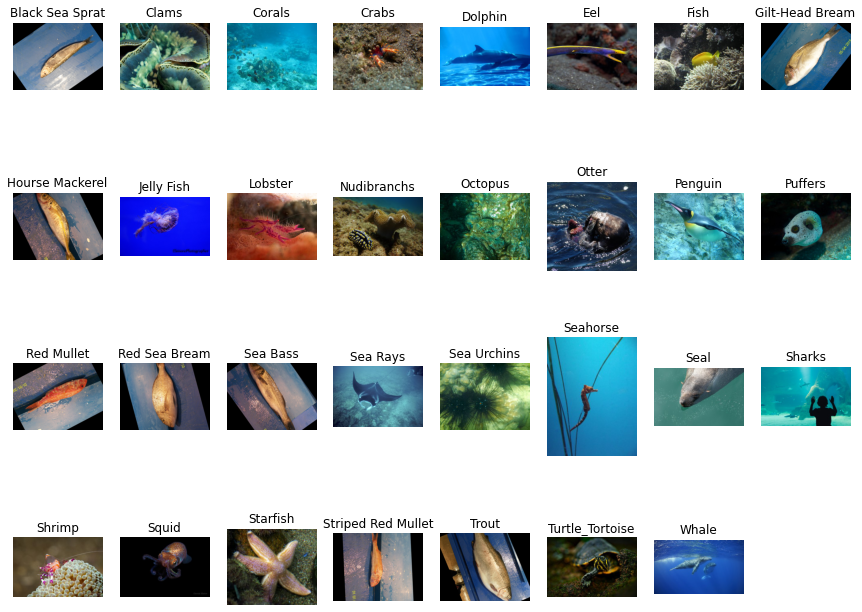

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import os

dx = 0
plt.figure(figsize=(15, 12))
for idx, unique_label in enumerate(df['label'].unique()):
    image_path = df[df['label'] == unique_label].iloc[0, 0]
    file_extension = os.path.splitext(image_path)[-1].lower()

    if file_extension in ('.png', '.jpg', '.jpeg'):
        try:
            img = Image.open(image_path)
            plt.subplot(4, 8, idx + 1)
            plt.imshow(img)
            plt.title(unique_label)
            plt.axis('off')
        except Exception as e:
            print(f"Error reading image: {e}")
    else:
        print(f"Skipping unsupported image format: {image_path}")


## Test-Train Split

In [12]:
#Creating the test train split with shuffle
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [13]:
#Checking the shaoe of the newly obtained data
print(train_df.shape)
print(test_df.shape)

(17368, 2)
(4343, 2)


## Image Generation and Preprocessing<a name ="h5"></a>

In [14]:


#Using Keras Image Data Generator to preprocess our images with the model we wish to use 
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


In [15]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 13895 validated image filenames belonging to 31 classes.
Found 3473 validated image filenames belonging to 31 classes.
Found 4343 validated image filenames belonging to 31 classes.


In [16]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Black Sea Sprat': 0,
 'Clams': 1,
 'Corals': 2,
 'Crabs': 3,
 'Dolphin': 4,
 'Eel': 5,
 'Fish': 6,
 'Gilt-Head Bream': 7,
 'Hourse Mackerel': 8,
 'Jelly Fish': 9,
 'Lobster': 10,
 'Nudibranchs': 11,
 'Octopus': 12,
 'Otter': 13,
 'Penguin': 14,
 'Puffers': 15,
 'Red Mullet': 16,
 'Red Sea Bream': 17,
 'Sea Bass': 18,
 'Sea Rays': 19,
 'Sea Urchins': 20,
 'Seahorse': 21,
 'Seal': 22,
 'Sharks': 23,
 'Shrimp': 24,
 'Squid': 25,
 'Starfish': 26,
 'Striped Red Mullet': 27,
 'Trout': 28,
 'Turtle_Tortoise': 29,
 'Whale': 30}

{'Black Sea Sprat': 0,
 'Clams': 1,
 'Corals': 2,
 'Crabs': 3,
 'Dolphin': 4,
 'Eel': 5,
 'Fish': 6,
 'Gilt-Head Bream': 7,
 'Hourse Mackerel': 8,
 'Jelly Fish': 9,
 'Lobster': 10,
 'Nudibranchs': 11,
 'Octopus': 12,
 'Otter': 13,
 'Penguin': 14,
 'Puffers': 15,
 'Red Mullet': 16,
 'Red Sea Bream': 17,
 'Sea Bass': 18,
 'Sea Rays': 19,
 'Sea Urchins': 20,
 'Seahorse': 21,
 'Seal': 22,
 'Sharks': 23,
 'Shrimp': 24,
 'Squid': 25,
 'Starfish': 26,
 'Striped Red Mullet': 27,
 'Trout': 28,
 'Turtle_Tortoise': 29,
 'Whale': 30}

{'Black Sea Sprat': 0,
 'Clams': 1,
 'Corals': 2,
 'Crabs': 3,
 'Dolphin': 4,
 'Eel': 5,
 'Fish': 6,
 'Gilt-Head Bream': 7,
 'Hourse Mackerel': 8,
 'Jelly Fish': 9,
 'Lobster': 10,
 'Nudibranchs': 11,
 'Octopus': 12,
 'Otter': 13,
 'Penguin': 14,
 'Puffers': 15,
 'Red Mullet': 16,
 'Red Sea Bream': 17,
 'Sea Bass': 18,
 'Sea Rays': 19,
 'Sea Urchins': 20,
 'Seahorse': 21,
 'Seal': 22,
 'Sharks': 23,
 'Shrimp': 24,
 'Squid': 25,
 'Starfish': 26,
 'Striped Red Mullet': 27,
 'Trout': 28,
 'Turtle_Tortoise': 29,
 'Whale': 30}

In [17]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

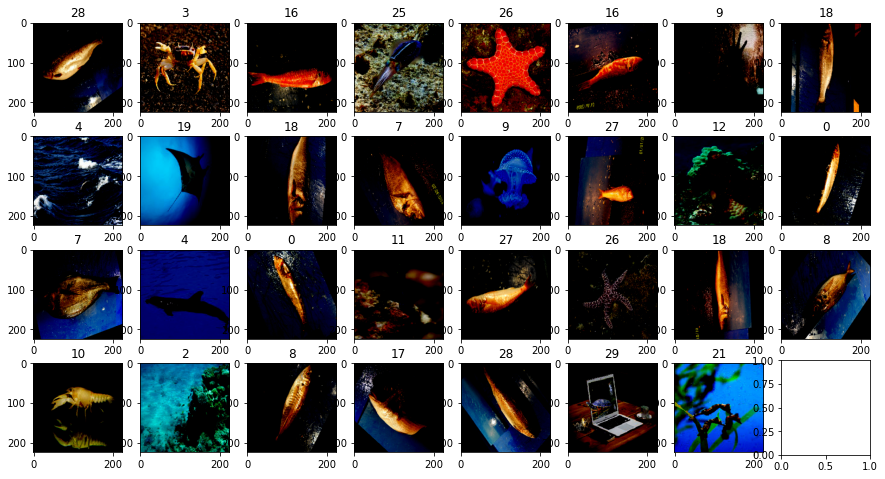

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming test_images is an ImageDataGenerator or data generator
num_classes = 31  # Number of classes
num_images_to_display = 31  # Number of images you want to display

# Create subplots
fig, ax = plt.subplots(nrows=4, ncols=8, figsize=(15, 8))
ax = ax.flatten()

# Iterate through the data generator to display images
for i in range(num_images_to_display):
    img, label = next(test_images)  # Assuming 'test_images' is a data generator
    ax[i].imshow(img[0])
    label_index = np.argmax(label)
    ax[i].set_title(label_index)  # Assuming labels are one-hot encoded

plt.show()



## Model Training and Evaluation<a name ="h6"></a>

## MobileNet v2 Architecture -
<center> <img src = "https://1.bp.blogspot.com/-M8UvZJWNW4E/WsKk-tbzp8I/AAAAAAAAChw/OqxBVPbDygMIQWGug4ZnHNDvuyK5FBMcQCLcBGAs/s1600/image5.png" width = 60%></center>

<p align="justify">MobileNetV2 is a convolutional neural network architecture that seeks to perform well on mobile devices. It is based on an inverted residual structure where the residual connections are between the bottleneck layers. The intermediate expansion layer uses lightweight depthwise convolutions to filter features as a source of non-linearity. As a whole, the architecture of MobileNetV2 contains the initial fully convolution layer with 32 filters, followed by 19 residual bottleneck layers.


In [19]:
#Importing our pretrained model : MobileNetV2

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [20]:
#Creating our model inputs
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(31, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_images,
                    validation_data=val_images,
                    epochs=5)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

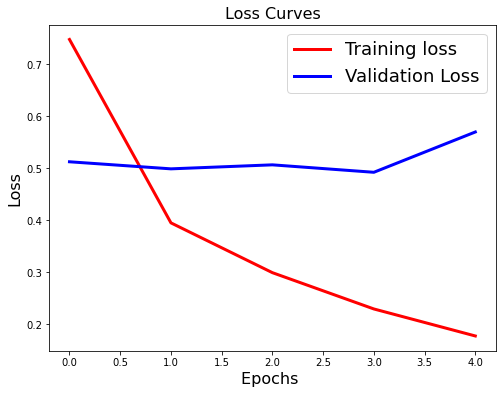

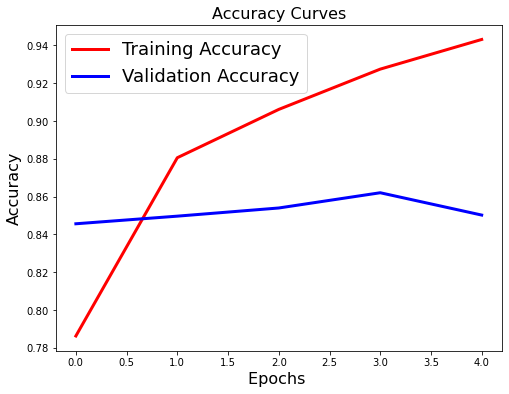

In [22]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)   
plt.show()

In [21]:
results = model.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.54557
Test Accuracy: 86.00%


In [23]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)

136/136 [==============================] - 155s 1s/step


In [24]:
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

In [25]:
# Visualize the pred_df
pred_df=pred_df.reset_index(drop=True)
pred_df.head(10)

,path,label,pred
0,/Users/SRAVYA/Downloads/archive (1)\Trout\Trou...,Trout,Trout
1,/Users/SRAVYA/Downloads/archive (1)\Clams\8529...,Clams,Clams
2,/Users/SRAVYA/Downloads/archive (1)\Lobster\73...,Lobster,Shrimp
3,/Users/SRAVYA/Downloads/archive (1)\Lobster\87...,Lobster,Eel
4,/Users/SRAVYA/Downloads/archive (1)\Nudibranch...,Nudibranchs,Nudibranchs
5,/Users/SRAVYA/Downloads/archive (1)\Whale\5653...,Whale,Whale
6,/Users/SRAVYA/Downloads/archive (1)\Starfish\6...,Starfish,Octopus
7,/Users/SRAVYA/Downloads/archive (1)\Penguin\15...,Penguin,Penguin
8,/Users/SRAVYA/Downloads/archive (1)\Jelly Fish...,Jelly Fish,Jelly Fish
9,/Users/SRAVYA/Downloads/archive (1)\Gilt-Head ...,Gilt-Head Bream,Gilt-Head Bream


In [26]:
# Incorrect prediction
pred_df[pred_df['label']!=pred_df['pred']]

,path,label,pred
2,/Users/SRAVYA/Downloads/archive (1)\Lobster\73...,Lobster,Shrimp
3,/Users/SRAVYA/Downloads/archive (1)\Lobster\87...,Lobster,Eel
6,/Users/SRAVYA/Downloads/archive (1)\Starfish\6...,Starfish,Octopus
14,/Users/SRAVYA/Downloads/archive (1)\Turtle_Tor...,Turtle_Tortoise,Seahorse
19,/Users/SRAVYA/Downloads/archive (1)\Turtle_Tor...,Turtle_Tortoise,Clams
...,...,...,...
4312,/Users/SRAVYA/Downloads/archive (1)\Nudibranch...,Nudibranchs,Shrimp
4318,/Users/SRAVYA/Downloads/archive (1)\Turtle_Tor...,Turtle_Tortoise,Dolphin
4324,/Users/SRAVYA/Downloads/archive (1)\Corals\867...,Corals,Sea Rays
4334,/Users/SRAVYA/Downloads/archive (1)\Lobster\34...,Lobster,Crabs


In [27]:
pred_df.path[1604]

'/Users/SRAVYA/Downloads/archive (1)\\Trout\\Trout\\00451.png'

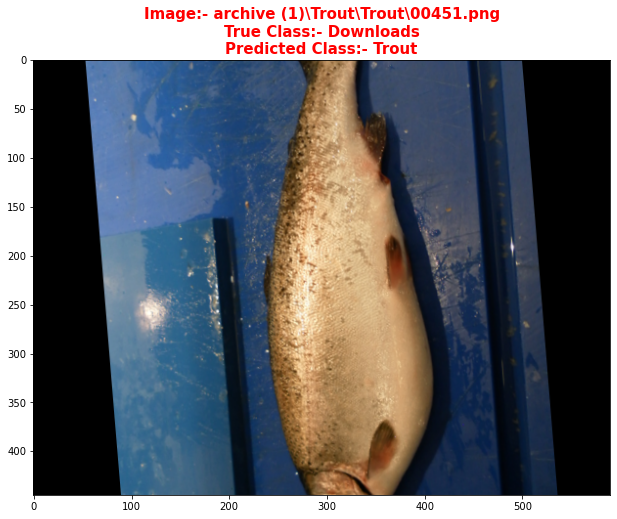

In [28]:
# Which image was it?
plt.figure(figsize=(15,8))
plt.imshow(plt.imread(pred_df.path[1604]))
title1 = pred_df.path[1604].split('/')[-2]
title2 = pred_df.path[1604].split('/')[-1]
title3 = pred_df.pred[1604]
plt.title(f'Image:- {title2}\nTrue Class:- {title1}\nPredicted Class:- {title3}', color = 'r', weight = 'bold', fontsize = 15)
plt.show()

Accuracy Score: 0.860004605111674


<AxesSubplot:>

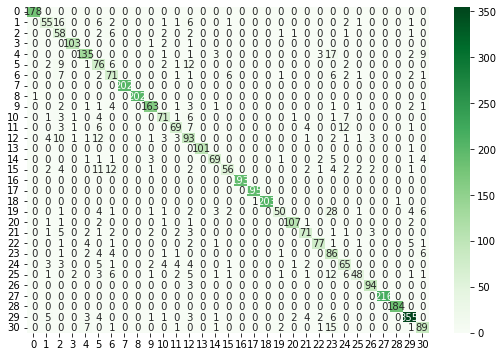

In [37]:
#Checking the accuracy score and creating a Confusion Matrix
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
plt.figure(figsize=(9,6))
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d', cmap='Greens')

In [30]:
#Generating the Classification Report for in-depth analysis
print(classification_report(pred_df['label'],pred_df['pred']))

                    precision    recall  f1-score   support

   Black Sea Sprat       0.99      1.00      1.00       178
             Clams       0.73      0.60      0.66        92
            Corals       0.47      0.78      0.59        74
             Crabs       0.95      0.96      0.96       107
           Dolphin       0.86      0.79      0.82       171
               Eel       0.53      0.68      0.60       111
              Fish       0.60      0.70      0.65       101
   Gilt-Head Bream       1.00      1.00      1.00       202
   Hourse Mackerel       1.00      1.00      1.00       203
        Jelly Fish       0.93      0.90      0.91       181
           Lobster       0.79      0.74      0.76        96
       Nudibranchs       0.79      0.67      0.73       103
           Octopus       0.59      0.68      0.63       136
             Otter       1.00      0.99      1.00       102
           Penguin       0.86      0.78      0.82        88
           Puffers       0.84      0.55